In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [3]:
import kagglehub

path = kagglehub.dataset_download("prakharrathi25/copd-student-dataset")

print("Path to dataset files:", path)

/media/yuk/HOLLOW/SharedRoot/machine/MainProjects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/yuk/.cache/kagglehub/datasets/prakharrathi25/copd-student-dataset/versions/2


In [4]:
filepath = "/media/yuk/HOLLOW/SharedRoot/machine/MainProjects/dataset.csv"

In [5]:
emph_data = pd.read_csv(filepath)
emph_data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [6]:
feature_names = list(emph_data.columns.values)
feature_names

['Unnamed: 0',
 'ID',
 'AGE',
 'PackHistory',
 'COPDSEVERITY',
 'MWT1',
 'MWT2',
 'MWT1Best',
 'FEV1',
 'FEV1PRED',
 'FVC',
 'FVCPRED',
 'CAT',
 'HAD',
 'SGRQ',
 'AGEquartiles',
 'copd',
 'gender',
 'smoking',
 'Diabetes',
 'muscular',
 'hypertension',
 'AtrialFib',
 'IHD']

In [7]:
emph_data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [8]:
columns = ['Unnamed: 0','ID','COPDSEVERITY','FEV1PRED','FVCPRED','MWT1','MWT2']
emph_data.drop(columns = columns , axis =1 , inplace = True )

In [9]:
#columns = ['Unnamed: 0']
#emph_data.drop(columns = columns , axis =1 , inplace = True )

In [10]:
emph_data.shape

(101, 17)

In [11]:
emph_data.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,2.40,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,1.64,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,2.30,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,1.14,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,2.91,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [12]:
emph_data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FVC             0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [13]:
emph_data[emph_data['MWT1Best'].isna()]

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
100,78,55.0,NaN,1.15,2.01,18,7.0,30.21,4,2,1,2,0,0,0,0,0


In [14]:
emph_data.fillna(emph_data.mean(), inplace=True)

In [15]:
emph_data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FVC             0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [16]:
emph_data.describe()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.09901,39.698020,399.110000,1.603762,2.954950,19.336634,11.180198,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,7.89874,24.558713,106.016027,0.672763,0.976283,18.674730,8.588807,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,44.00000,1.000000,120.000000,0.450000,1.140000,3.000000,0.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.00000,20.000000,305.000000,1.100000,2.270000,12.000000,6.000000,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.00000,36.000000,420.000000,1.600000,2.770000,18.000000,10.000000,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.00000,54.000000,465.000000,1.960000,3.630000,24.000000,15.000000,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.00000,109.000000,699.000000,3.180000,5.370000,188.000000,56.200000,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
emph_data.dtypes

AGE               int64
PackHistory     float64
MWT1Best        float64
FEV1            float64
FVC             float64
CAT               int64
HAD             float64
SGRQ            float64
AGEquartiles      int64
copd              int64
gender            int64
smoking           int64
Diabetes          int64
muscular          int64
hypertension      int64
AtrialFib         int64
IHD               int64
dtype: object

In [18]:
emph_data = emph_data.astype(float)

In [19]:
emph_data.dtypes

AGE             float64
PackHistory     float64
MWT1Best        float64
FEV1            float64
FVC             float64
CAT             float64
HAD             float64
SGRQ            float64
AGEquartiles    float64
copd            float64
gender          float64
smoking         float64
Diabetes        float64
muscular        float64
hypertension    float64
AtrialFib       float64
IHD             float64
dtype: object

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PackHistory'}>,
        <Axes: title={'center': 'MWT1Best'}>,
        <Axes: title={'center': 'FEV1'}>],
       [<Axes: title={'center': 'FVC'}>, <Axes: title={'center': 'CAT'}>,
        <Axes: title={'center': 'HAD'}>,
        <Axes: title={'center': 'SGRQ'}>],
       [<Axes: title={'center': 'AGEquartiles'}>,
        <Axes: title={'center': 'copd'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'smoking'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'muscular'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'AtrialFib'}>],
       [<Axes: title={'center': 'IHD'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

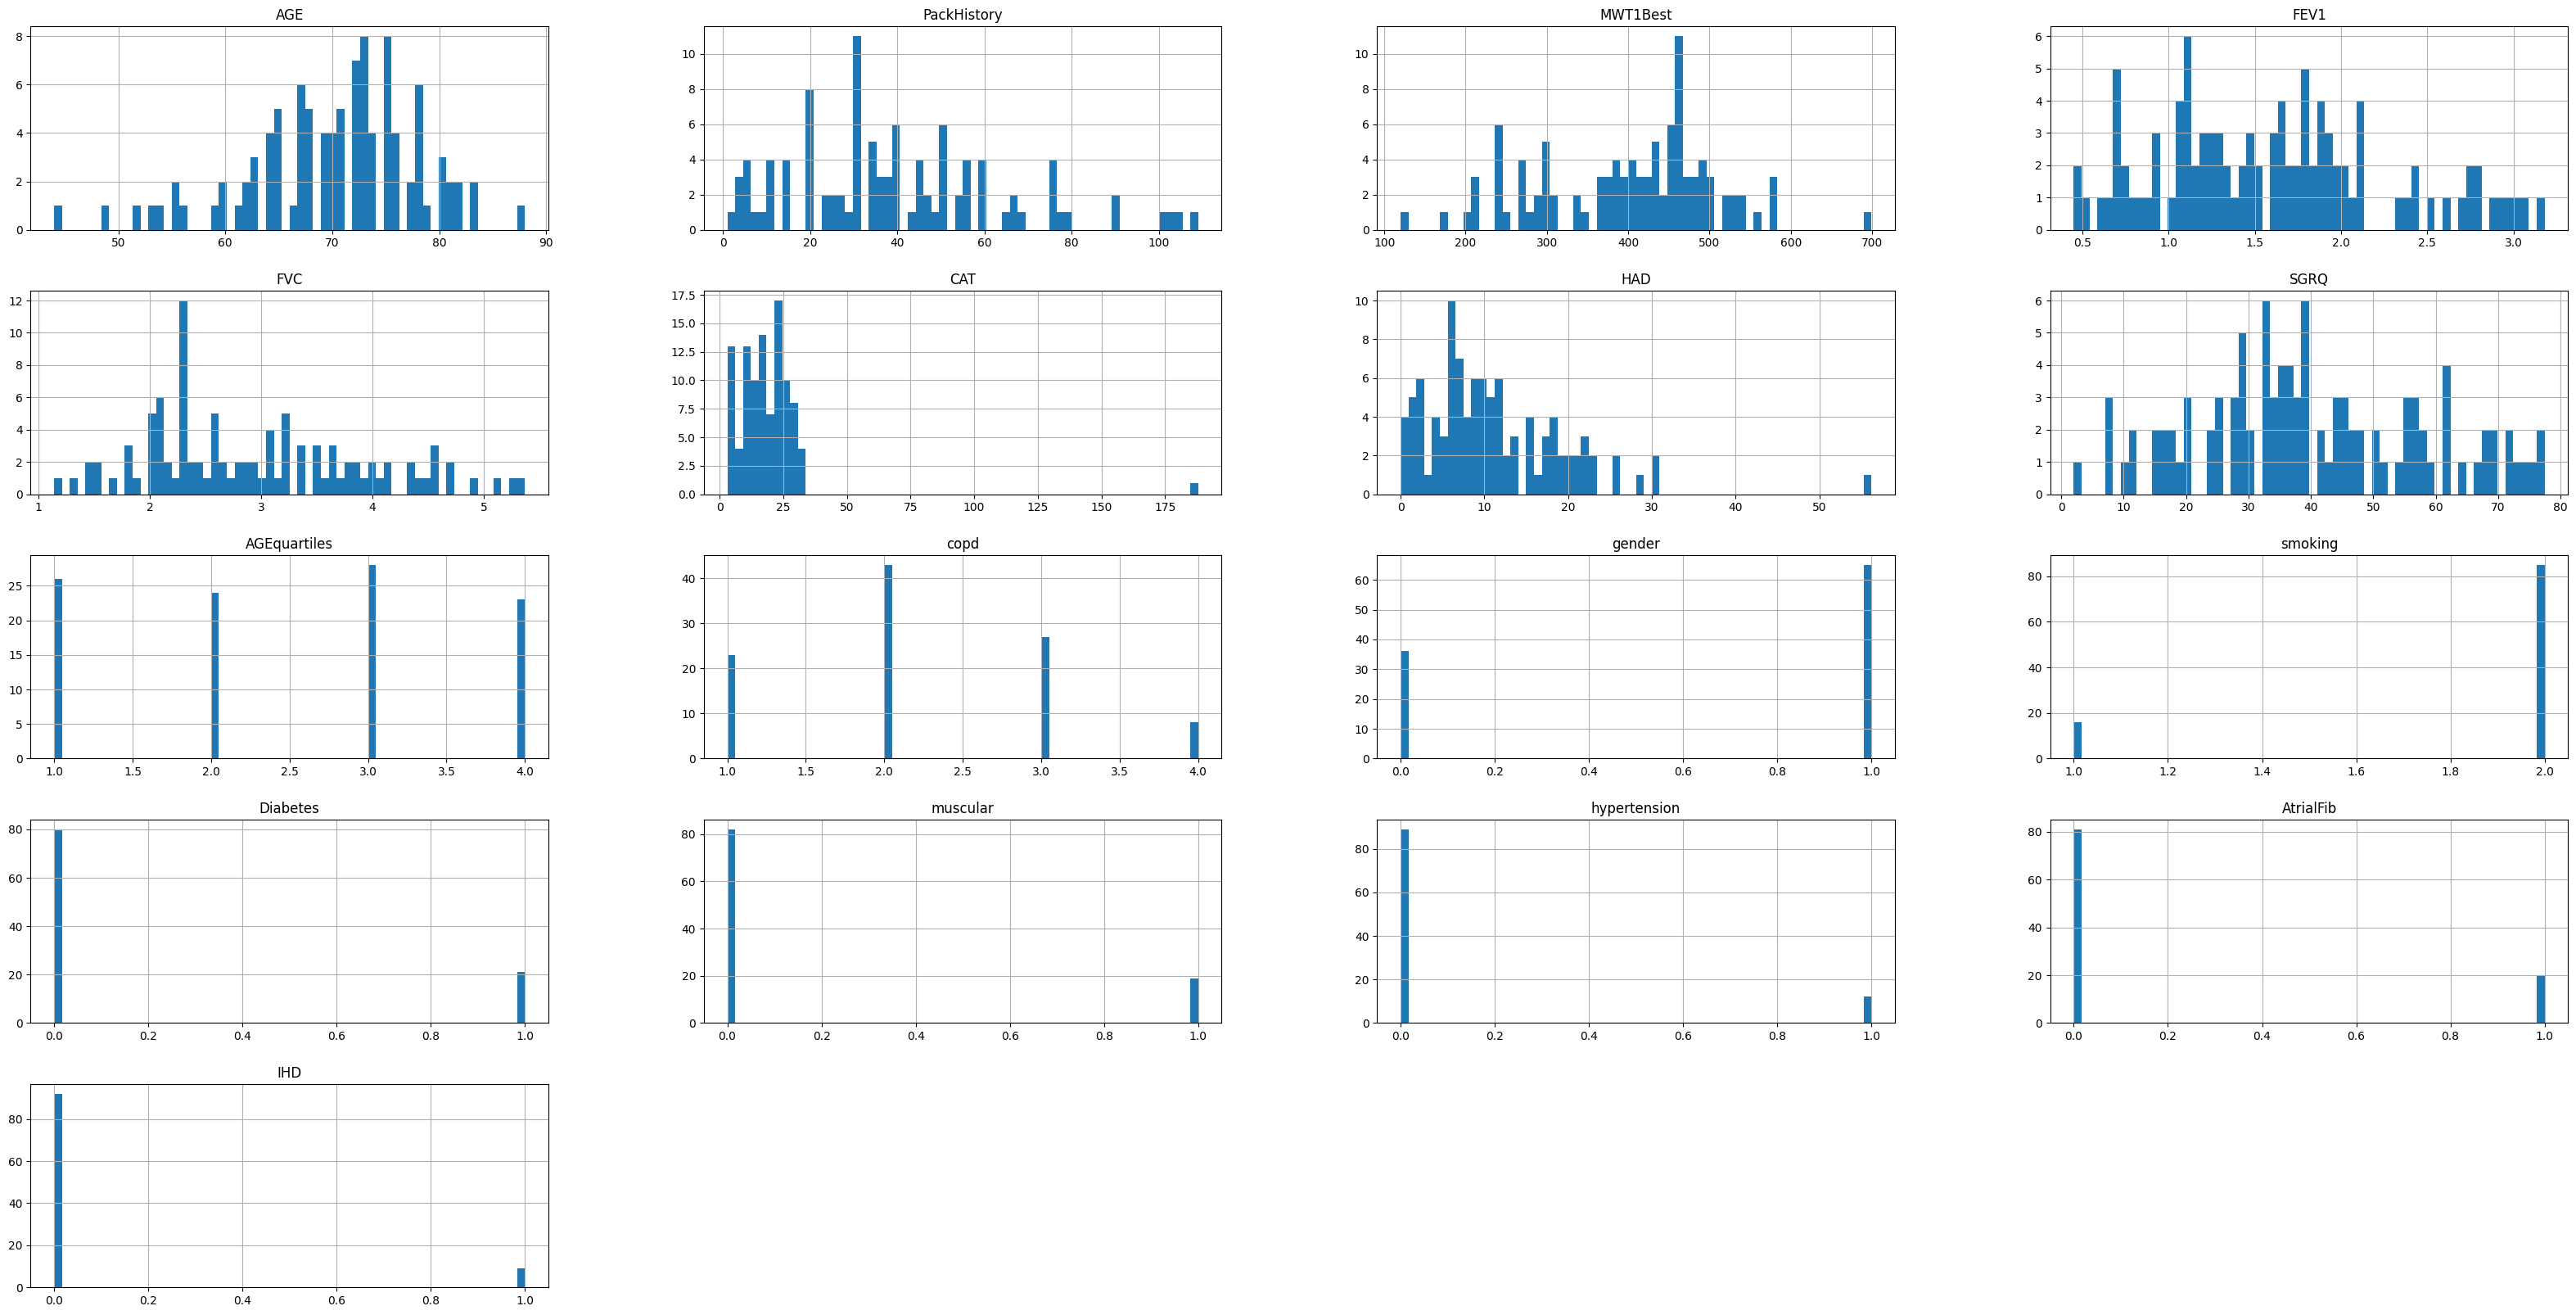

In [20]:
emph_data.hist(bins =60 , figsize=(40,20))

In [21]:
emph_data.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77.0,60.0,120.0,1.21,2.40,25.0,8.0,69.55,4.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0
1,79.0,50.0,176.0,1.09,1.64,12.0,21.0,44.24,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0
2,80.0,11.0,201.0,1.52,2.30,22.0,18.0,44.09,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
3,56.0,60.0,210.0,0.47,1.14,28.0,26.0,62.04,1.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0
4,65.0,68.0,210.0,1.07,2.91,32.0,18.0,75.56,1.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0


In [22]:
corr_emph_data = emph_data.corr()
corr_emph_data

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
AGE,1.000000,-0.001546,-0.228927,-0.102122,-0.145226,0.083361,-0.227120,-0.139361,0.897985,-0.024335,0.159299,0.126220,0.136338,0.168002,-0.105851,0.066447,0.128710
PackHistory,-0.001546,1.000000,-0.251688,-0.131505,-0.093073,-0.143248,0.027876,0.032126,0.010821,0.067314,0.021258,0.021270,0.042273,0.009059,-0.014245,0.223717,-0.016045
MWT1Best,-0.228927,-0.251688,1.000000,0.468135,0.443589,-0.154483,-0.287082,-0.532836,-0.214253,-0.417513,0.137756,0.025386,-0.363872,0.021113,0.028044,-0.527146,0.112342
FEV1,-0.102122,-0.131505,0.468135,1.000000,0.820165,-0.064804,-0.148147,-0.303407,-0.089200,-0.767522,0.312375,0.005679,-0.176360,0.125970,0.099870,-0.179457,0.104666
FVC,-0.145226,-0.093073,0.443589,0.820165,1.000000,-0.158859,-0.129682,-0.220090,-0.119674,-0.546803,0.403649,0.007515,-0.234672,0.045273,0.050102,-0.164171,0.070670
CAT,0.083361,-0.143248,-0.154483,-0.064804,-0.158859,1.000000,0.161919,0.287782,0.127775,0.020165,0.051307,-0.027163,-0.006656,0.262596,-0.044527,-0.017024,-0.050551
HAD,-0.227120,0.027876,-0.287082,-0.148147,-0.129682,0.161919,1.000000,0.395790,-0.209646,0.161052,-0.178305,-0.070175,0.120517,0.016530,0.182740,0.102902,0.025937
SGRQ,-0.139361,0.032126,-0.532836,-0.303407,-0.220090,0.287782,0.395790,1.000000,-0.078246,0.328044,-0.020890,-0.204016,0.242630,0.034674,0.023756,0.172810,0.027493
AGEquartiles,0.897985,0.010821,-0.214253,-0.089200,-0.119674,0.127775,-0.209646,-0.078246,1.000000,0.025447,0.282814,0.063935,0.132985,0.159898,-0.213427,0.056130,0.148613
copd,-0.024335,0.067314,-0.417513,-0.767522,-0.546803,0.020165,0.161052,0.328044,0.025447,1.000000,0.050062,0.097738,0.078869,-0.108438,0.056525,0.170708,-0.109995


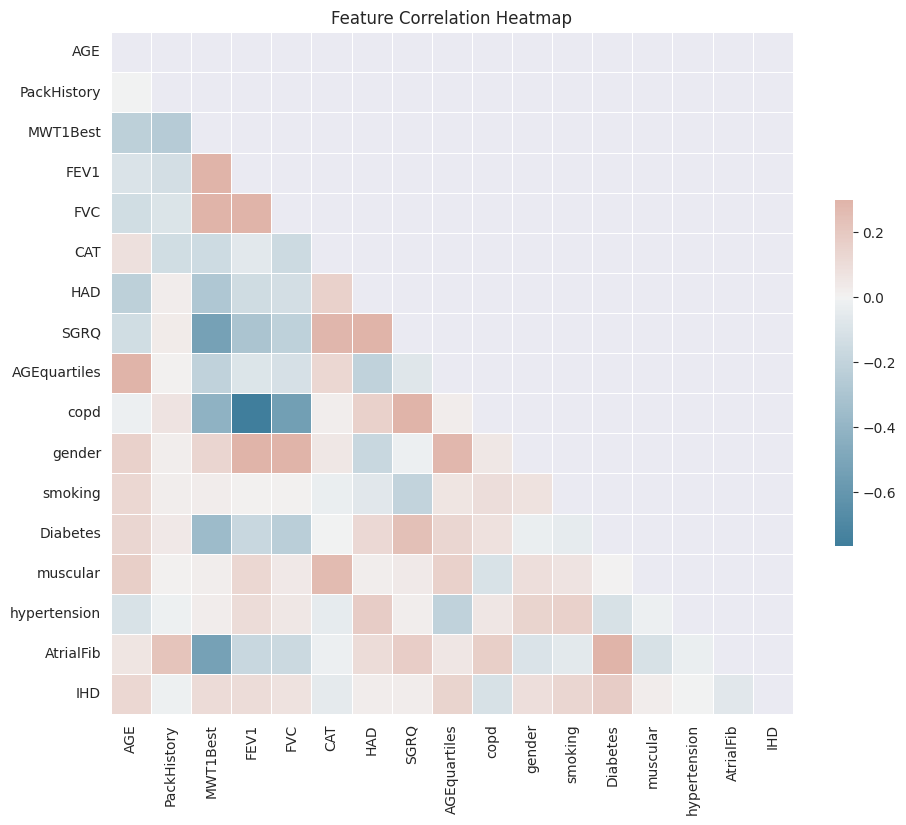

In [23]:
import seaborn as sns
sns.set_style('dark')

mask = np.triu(np.ones_like(corr_emph_data, dtype=bool))

f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr_emph_data, mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()

In [35]:
corr_emph_data["MWT1Best"].sort_values(ascending=False)

MWT1Best        1.000000
FEV1            0.468135
FVC             0.443589
gender          0.137756
IHD             0.112342
hypertension    0.028044
smoking         0.025386
muscular        0.021113
CAT            -0.154483
AGEquartiles   -0.214253
AGE            -0.228927
PackHistory    -0.251688
HAD            -0.287082
Diabetes       -0.363872
copd           -0.417513
AtrialFib      -0.527146
SGRQ           -0.532836
Name: MWT1Best, dtype: float64

In [25]:
emph_data["FEV1_FVC_Ratio"] = emph_data["FEV1"] / emph_data["FVC"]
emph_data.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,FEV1_FVC_Ratio
0,77.0,60.0,120.0,1.21,2.40,25.0,8.0,69.55,4.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.504167
1,79.0,50.0,176.0,1.09,1.64,12.0,21.0,44.24,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.664634
2,80.0,11.0,201.0,1.52,2.30,22.0,18.0,44.09,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.660870
3,56.0,60.0,210.0,0.47,1.14,28.0,26.0,62.04,1.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.412281
4,65.0,68.0,210.0,1.07,2.91,32.0,18.0,75.56,1.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.367698


In [27]:
X1 = emph_data.iloc[:, 0:18]

In [28]:
X2 = emph_data.iloc[:, 0:18]

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaleMinMax = MinMaxScaler(feature_range=(0,1))

X2 = scaleMinMax.fit_transform(X2)

In [ ]:
X2 = pd.DataFrame(X2 , columns=['AGE','PackHistory','MWT1Best','FEV1','FVC','CAT','HAD','SGRQ'	,'AGEquartiles','copd','gender','smoking','Diabetes','muscular','hypertension',	'AtrialFib','IHD','FEV1_FVC_Ratio'])

In [31]:
X2.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,FEV1_FVC_Ratio
0,0.750000,0.546296,0.000000,0.278388,0.297872,0.118919,0.142349,0.895414,1.0,0.666667,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.426946
1,0.795455,0.453704,0.096718,0.234432,0.118203,0.048649,0.373665,0.559915,1.0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.693947
2,0.818182,0.092593,0.139896,0.391941,0.274232,0.102703,0.320285,0.557927,1.0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.687683
3,0.272727,0.546296,0.155440,0.007326,0.000000,0.135135,0.462633,0.795864,0.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.274057
4,0.477273,0.620370,0.155440,0.227106,0.418440,0.156757,0.320285,0.975080,0.0,0.666667,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.199875


<Axes: xlabel='FEV1_FVC_Ratio', ylabel='MWT1Best'>

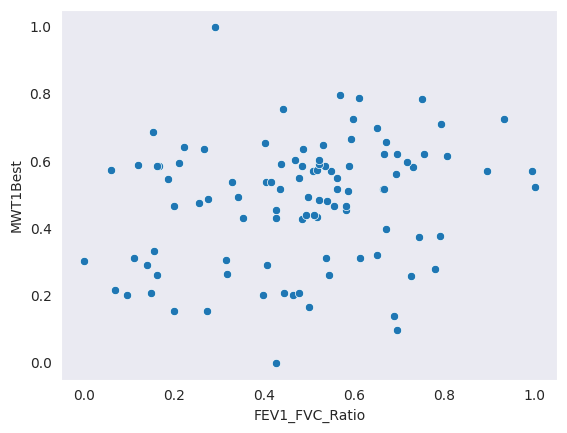

In [38]:
import seaborn as sns 

sns.scatterplot(data=X2, x="FEV1_FVC_Ratio", y="MWT1Best")

In [39]:
X2["Lung_Efficiency_Index"] = X2["FEV1_FVC_Ratio"] * X2["MWT1Best"]

In [40]:
X2.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,FEV1_FVC_Ratio,Lung_Efficiency_Index
0,0.750000,0.546296,0.000000,0.278388,0.297872,0.118919,0.142349,0.895414,1.0,0.666667,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.426946,0.000000
1,0.795455,0.453704,0.096718,0.234432,0.118203,0.048649,0.373665,0.559915,1.0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.693947,0.067118
2,0.818182,0.092593,0.139896,0.391941,0.274232,0.102703,0.320285,0.557927,1.0,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.687683,0.096204
3,0.272727,0.546296,0.155440,0.007326,0.000000,0.135135,0.462633,0.795864,0.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.274057,0.042600
4,0.477273,0.620370,0.155440,0.227106,0.418440,0.156757,0.320285,0.975080,0.0,0.666667,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.199875,0.031069
